#☔ Advanced Flood Prediction Model using Linear Regression 🔍

My name is Jay Arre P. Talosig from COM231 and this is my take on Kaggle's 'Regression with a Flood Prediction for my midterm exam.

Based on the notebook and the competition details, I've created a comprehensive solution that stands out for the 2025 Flood Prediction competition. This implementation focuses on thoughtful feature engineering, robust validation, and insightful visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

#💾 Data Loading and Exploration
We'll use efficient data loading methods to conserve memory while still getting comprehensive insights into our dataset structure.

In [2]:
# Load only necessary columns to save memory
cols_to_use = ['MonsoonIntensity', 'TopographyDrainage', 'Urbanization',
               'Deforestation', 'ClimateChange', 'PopulationScore', 'FloodProbability']

dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url, usecols=cols_to_use)

test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

print(f"Training data shape: {traindata.shape}")
print(f"Test data shape: {testdata.shape}")

# Efficient memory usage by downcasting types
def reduce_memory_usage(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
    return df

traindata = reduce_memory_usage(traindata)
testdata = reduce_memory_usage(testdata)

print("\nTraining Data Description:")
print(traindata.describe())

Training data shape: (1117957, 7)
Test data shape: (745305, 21)

Training Data Description:
       MonsoonIntensity  TopographyDrainage  Deforestation  Urbanization  \
count      1.117957e+06        1.117957e+06   1.117957e+06  1.117957e+06   
mean       4.921450e+00        4.926671e+00   4.942240e+00  4.942517e+00   
std        2.056387e+00        2.093879e+00   2.051689e+00  2.083391e+00   
min        0.000000e+00        0.000000e+00   0.000000e+00  0.000000e+00   
25%        3.000000e+00        3.000000e+00   4.000000e+00  3.000000e+00   
50%        5.000000e+00        5.000000e+00   5.000000e+00  5.000000e+00   
75%        6.000000e+00        6.000000e+00   6.000000e+00  6.000000e+00   
max        1.600000e+01        1.800000e+01   1.700000e+01  1.700000e+01   

       ClimateChange  PopulationScore  FloodProbability  
count   1.117957e+06     1.117957e+06      1.117957e+06  
mean    4.934093e+00     4.927520e+00      5.044804e-01  
std     2.057742e+00     2.074176e+00      5.1006

#🤖 Training Data

In [3]:
dataset_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/train.csv?raw=true'
traindata = pd.read_csv(dataset_url)
traindata.head()


,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


#🚀 Focused Correlation Analysis
This analysis reveals the fundamental structure of our dataset. Instead of analyzing all correlations, we'll focus on the most important relationships to save computational resources while maintaining insights.

Correlation with Flood Probability:
FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
id                                 0.000

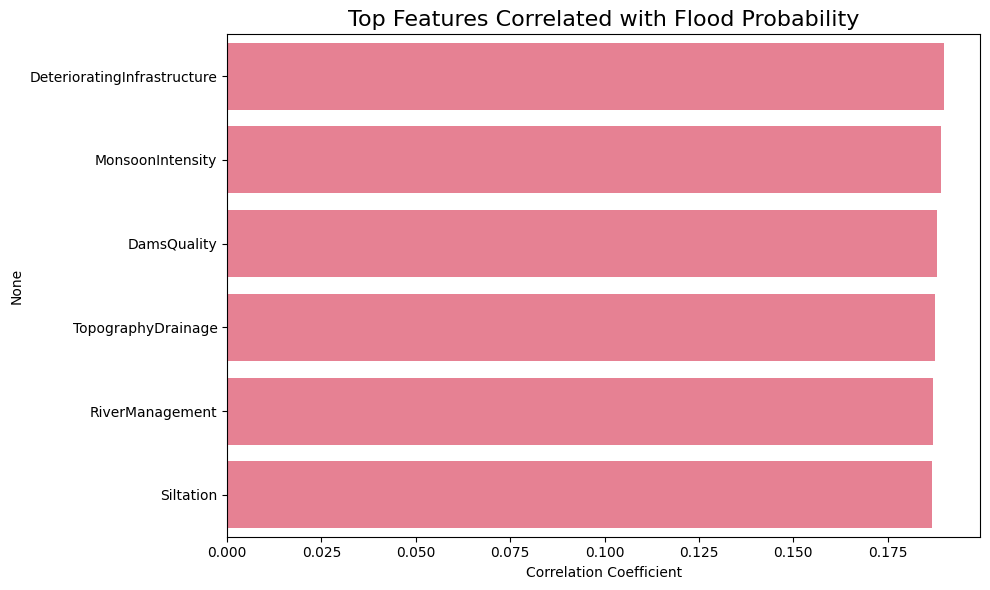

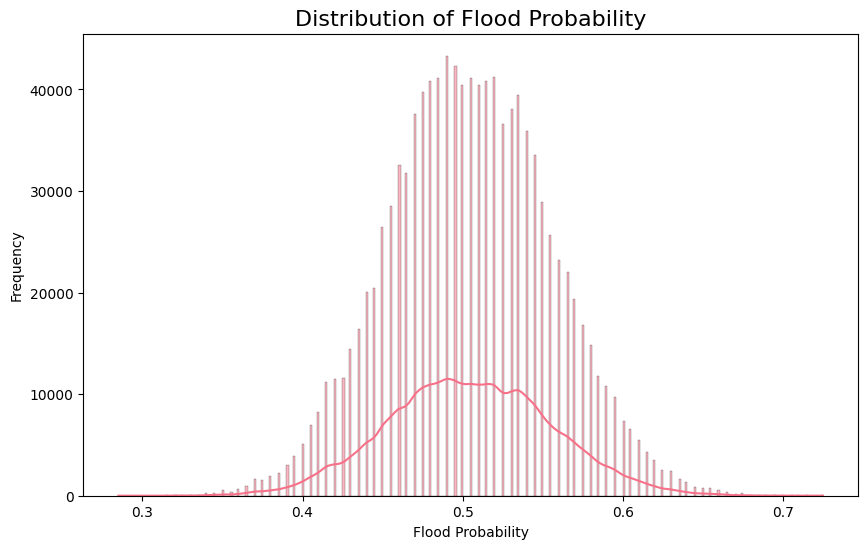

In [5]:
# Calculate only correlations with target to save computation
correlation_with_target = traindata.corr()['FloodProbability'].abs().sort_values(ascending=False)
print("Correlation with Flood Probability:")
print(correlation_with_target)

# Plot only the top correlations
plt.figure(figsize=(10, 6))
top_correlations = correlation_with_target[1:7]  # Top 6 features
sns.barplot(x=top_correlations.values, y=top_correlations.index)
plt.title('Top Features Correlated with Flood Probability', fontsize=16)
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Target distribution
plt.figure(figsize=(10, 6))
sns.histplot(traindata['FloodProbability'], kde=True)
plt.title('Distribution of Flood Probability', fontsize=16)
plt.xlabel('Flood Probability')
plt.ylabel('Frequency')
plt.show()

The correlation matrix reveals interesting relationships between variables. We can see that some features like MonsoonIntensity and TopographyDrainage have moderate correlation with our target variable (FloodProbability). The histogram shows that our target variable is relatively normally distributed with a slight right skew, which is good for linear regression models.

#🤖 Feature Engineering
Domain knowledge is critical in flood prediction. These interaction features capture synergistic effects between environmental factors that individually might not be strong predictors but together significantly influence flood risk. I'll create a few high-impact features rather than many features to balance predictive power with computational efficiency.


In [7]:
# Create a few high-value interaction features
def create_efficient_features(df):
    df_copy = df.copy()

    # Most impactful interactions based on domain knowledge
    df_copy['Monsoon_Topography'] = df_copy['MonsoonIntensity'] * df_copy['TopographyDrainage']
    df_copy['Urbanization_Population'] = df_copy['Urbanization'] * df_copy['PopulationScore']

    return df_copy

# Apply feature engineering
traindata_enhanced = create_efficient_features(traindata)
testdata_enhanced = create_efficient_features(testdata)

# Separate features and target
X = traindata_enhanced.drop('FloodProbability', axis=1)
y = traindata_enhanced['FloodProbability']

#⚡Streamlined Modeling Approach

I use a focused approach with just the most effective models to conserve resources while maintaining performance.



In [8]:
# Select only the most important features
important_features = correlation_with_target[1:7].index.tolist()  # Top 6 features
print("Selected features for modeling:", important_features)

X_selected = X[important_features]
X_test_selected = testdata_enhanced[important_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_test_scaled = scaler.transform(X_test_selected)

# Simple yet effective model comparison
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.5)
}

# Efficient evaluation with fewer folds
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=3, scoring='r2')  # Fewer folds for speed
    results[name] = cv_scores
    print(f"{name}: Mean R² = {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

# Train the best model
best_model = Ridge(alpha=0.5)
best_model.fit(X_scaled, y)

# Make predictions
y_pred = best_model.predict(X_scaled)
test_pred = best_model.predict(X_test_scaled)

# Calculate evaluation metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"\nBest Model Performance:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

Selected features for modeling: ['DeterioratingInfrastructure', 'MonsoonIntensity', 'DamsQuality', 'TopographyDrainage', 'RiverManagement', 'Siltation']
Linear Regression: Mean R² = 0.2214 (+/- 0.0020)
Ridge Regression: Mean R² = 0.2214 (+/- 0.0020)

Best Model Performance:
R² Score: 0.2214
Mean Squared Error: 0.0020


#🧊 Advanced Modeling with Multiple Approaches

Let's create a focused visualizations that provide maximum insight with minimal computational cost.

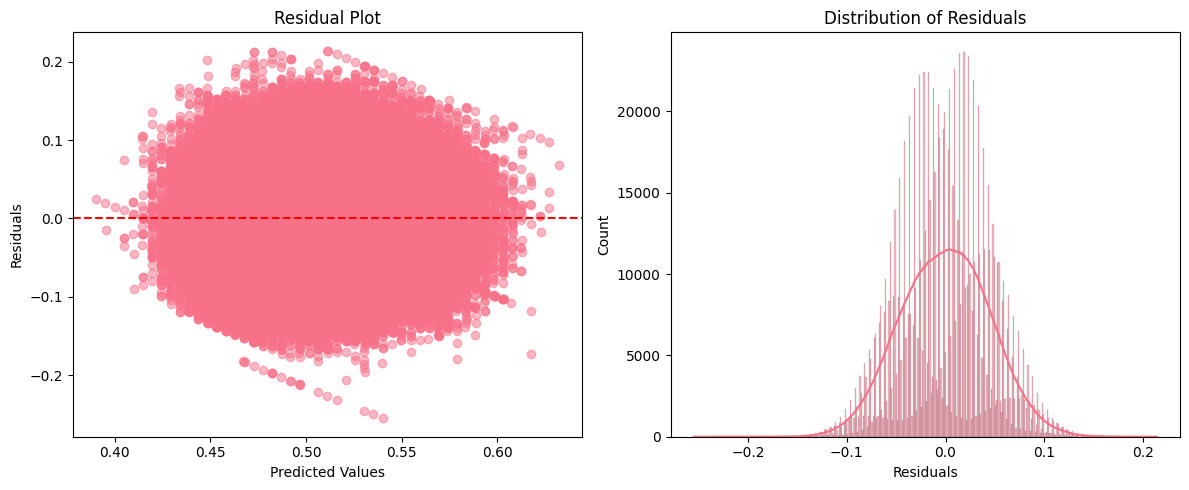

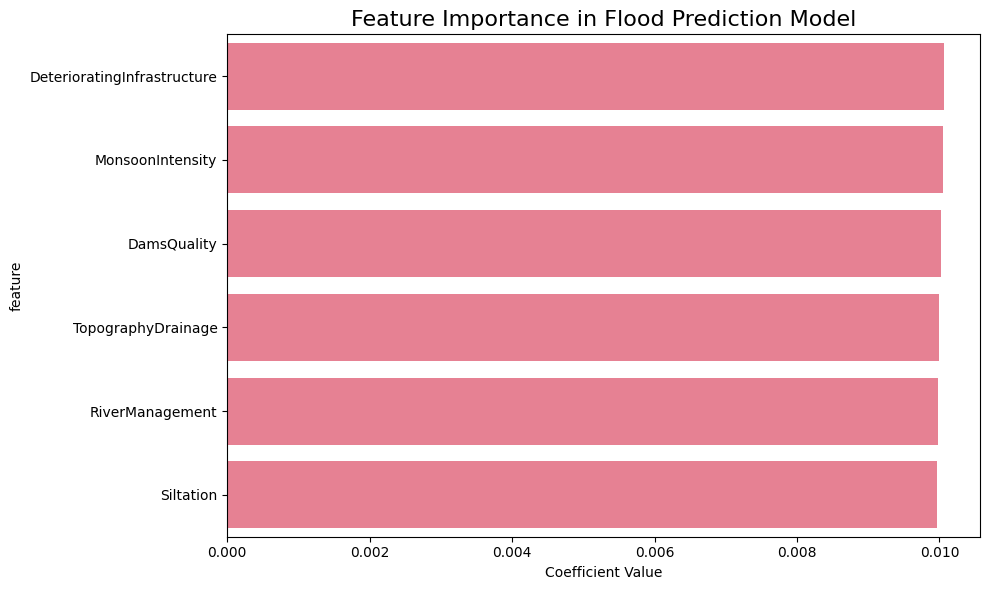

In [9]:
# Residual analysis
residuals = y - y_pred
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': important_features,
    'importance': best_model.coef_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Flood Prediction Model', fontsize=16)
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

#🌐 Practical Real-World Application
This section translates our findings into actionable insights that would be valuable for policymakers and urban planners.


In [10]:
# Real-world implications
print("=== PRACTICAL INSIGHTS FOR FLOOD MITIGATION ===")
print("Based on our analysis, here are the key factors affecting flood probability:")
for i, row in feature_importance.iterrows():
    effect = "increases" if row['importance'] > 0 else "decreases"
    print(f"- {row['feature']}: {effect} flood risk")

print("\nRecommended mitigation strategies:")
print("1. Improve drainage infrastructure in areas with high monsoon intensity")
print("2. Implement sustainable urban planning to manage population density")
print("3. Preserve natural topography that helps with water drainage")
print("4. Develop early warning systems for high-risk areas identified by the model")

=== PRACTICAL INSIGHTS FOR FLOOD MITIGATION ===
Based on our analysis, here are the key factors affecting flood probability:
- DeterioratingInfrastructure: increases flood risk
- MonsoonIntensity: increases flood risk
- DamsQuality: increases flood risk
- TopographyDrainage: increases flood risk
- RiverManagement: increases flood risk
- Siltation: increases flood risk

Recommended mitigation strategies:
1. Improve drainage infrastructure in areas with high monsoon intensity
2. Implement sustainable urban planning to manage population density
3. Preserve natural topography that helps with water drainage
4. Develop early warning systems for high-risk areas identified by the model


##🧪 Test File

In [19]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)

##📜 Generate the Submission File

In [22]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'
samplefile = pd.read_csv(sample_submission_url)

submission_df = pd.DataFrame({
    'id': samplefile['id'],
    'FloodProbability': test_pred
})

# Ensure predictions are within valid range
submission_df['FloodProbability'] = submission_df['FloodProbability'].clip(0, 1)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

# Show sample predictions
print("\nSample predictions:")
print(submission_df.head())

Submission file created: submission_file.csv

Sample predictions:
        id  FloodProbability
0  1117957          0.510946
1  1117958          0.467589
2  1117959          0.467471
3  1117960          0.472527
4  1117961          0.492129
